# Using Beautiful Soup to Read XML Information Table files from 13 HR filings

#### So far, we have collected all the information table links for 13F HR filings  In this code file, we will attempt to read the Information Tables using Beautiful Soup. 

#### First let us look at the XML info tables and the code behind the tables:
##### https://www.sec.gov/Archives/edgar/data/1356407/000135640717000002/xslForm13F_X01/a13f03312017.xml

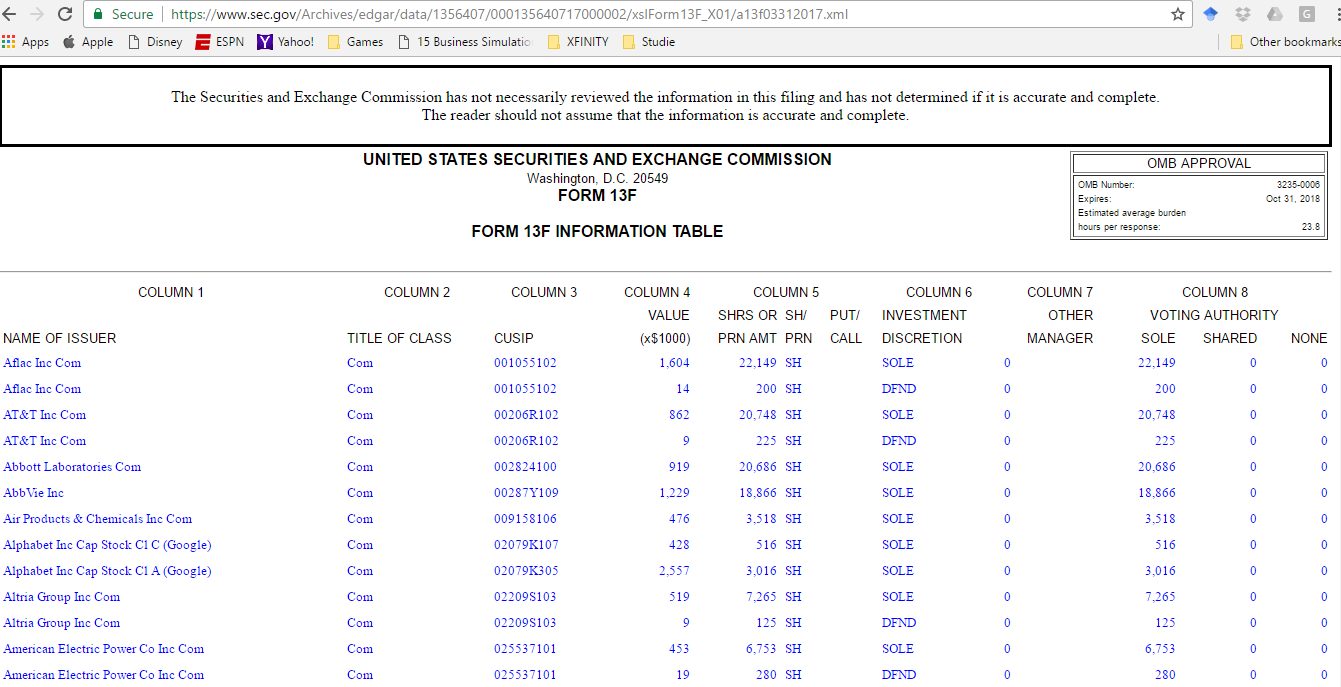

In [2]:
from IPython.display import Image
Image(filename='Files_Directory/Images/Edgar_Mutual_Info_Table_XML_1.png',width=800,height=10)

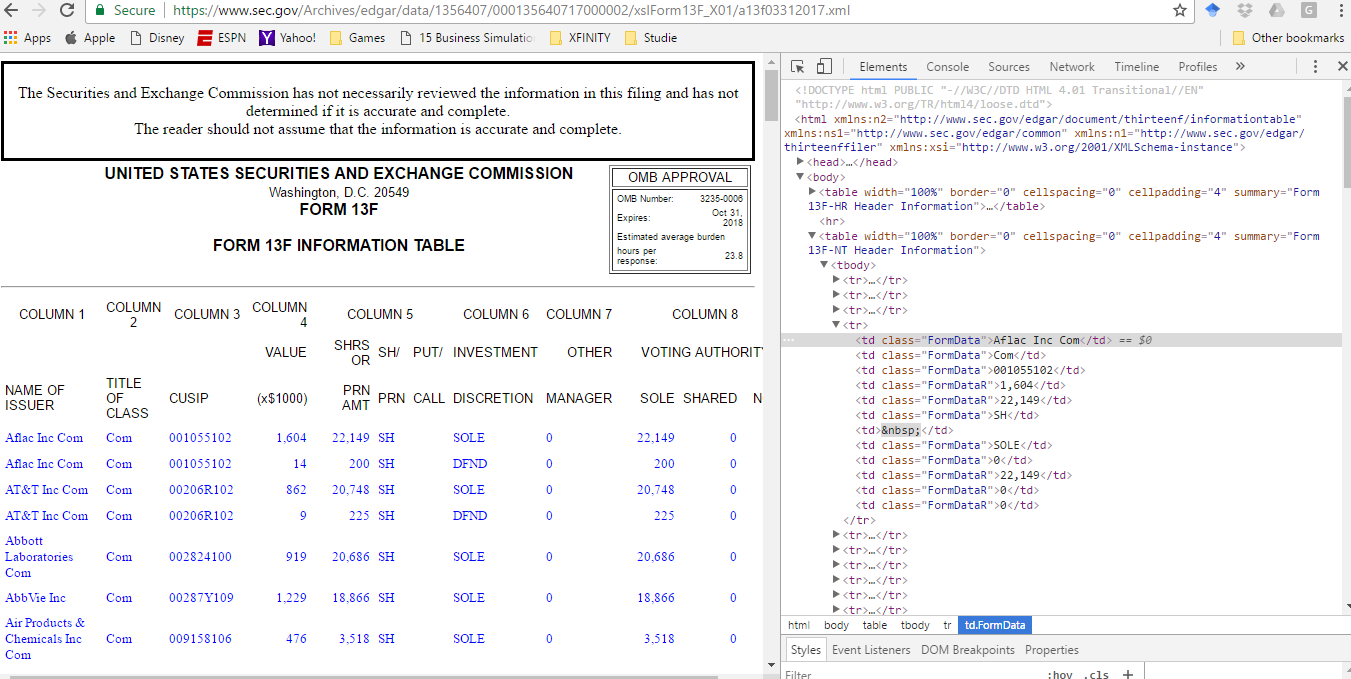

In [3]:
from IPython.display import Image
Image(filename='Files_Directory/Images/Edgar_Mutual_Info_Table_XML_2.png',width=800,height=10)

#### So all we need is to read the table row and table data tags and the class "FormData". For that we will be using the following code:

In [4]:
import urllib.request
import bs4 as bs
from bs4 import SoupStrainer

#### Also import codecs library

In [5]:
import codecs

In [6]:
mutual_fund_name = []
info_date = []
name_of_issuer = []
title_of_class = []
CUSIP = []
Value = []
Shares = []
SHRS_or_PRN = []
SH_PRN = []
PUTorCALL = []
Inv_Discretion = []
Other_Manager = []
Authority_Sole = []
Authority_Shared = []
Authority_None = []

In [7]:
CIK = []
xml_date = []
xml_Name = []
xml_link = []

input_file = open('Files_Directory/Edgar/Mutual_Fund_Info_Table_Link.txt', 'r')

rows = input_file.readlines()
input_file.close()

for i in range(1, len(rows)):
    columns = rows[i].split('\t')
    
    CIK.append(columns[0])
    
    if columns[4][:-1] == "xml":
       xml_link.append('https://www.sec.gov' + columns[3])
       xml_Name.append(columns[1])
       xml_date.append(columns[2])

FileNotFoundError: [Errno 2] No such file or directory: 'Files_Directory/Edgar/Mutual_Fund_Info_Table_Link.txt'

In [8]:
xml_link

[]

In [9]:
html = urllib.request.urlopen(xml_link[0]).read().decode('utf-8')
html[0:100]

IndexError: list index out of range

In [10]:
soup = bs.BeautifulSoup(html, 'html5lib')

NameError: name 'html' is not defined

In [1]:
infotable = soup.find_all("table", summary = "Form 13F-NT Header Information")
infotable[0]

NameError: name 'soup' is not defined

In [38]:
len(infotable)

1

#### There are three rows of headers, the remaining rows will be the data to store:

In [39]:
rows = infotable[0].find_all('tr')
len(rows)

267

#### Row 1-3: Headers 

In [40]:
rows[0]

<tr>
<td class="FormTextC">COLUMN 1</td><td class="FormTextC">COLUMN 2</td><td class="FormTextC">COLUMN 3</td><td class="FormTextR">COLUMN 4</td><td class="FormTextC" colspan="3">COLUMN 5</td><td class="FormTextC">COLUMN 6</td><td class="FormTextR">COLUMN 7</td><td class="FormTextC" colspan="3">COLUMN 8</td>
</tr>

In [41]:
rows[1]

<tr>
<td class="FormText"></td><td class="FormText"></td><td class="FormText"></td><td class="FormTextR">VALUE</td><td class="FormTextR">SHRS OR</td><td class="FormText">SH/</td><td class="FormText">PUT/</td><td class="FormText">INVESTMENT</td><td class="FormTextR">OTHER</td><td class="FormTextC" colspan="3">VOTING AUTHORITY</td>
</tr>

In [42]:
rows[2]

<tr>
<td class="FormText">NAME OF ISSUER</td><td class="FormText">TITLE OF CLASS</td><td class="FormText">CUSIP</td><td class="FormTextR">(x$1000)</td><td class="FormTextR">PRN AMT</td><td class="FormText">PRN</td><td class="FormText">CALL</td><td class="FormText">DISCRETION</td><td class="FormTextR">MANAGER</td><td class="FormTextR">SOLE</td><td class="FormTextR">SHARED</td><td class="FormTextR">NONE</td>
</tr>

#### Row 4: first row of observations

In [43]:
rows[3]

<tr>
<td class="FormData">ABBOTT LABORATORIES</td><td class="FormData">COM</td><td class="FormData">002824100</td><td class="FormDataR">9</td><td class="FormDataR">150</td><td class="FormData">SH</td><td> </td><td class="FormData">SOLE</td><td> </td><td class="FormDataR">0</td><td class="FormDataR">0</td><td class="FormDataR">150</td>
</tr>

#### Let's use Beautiful Soup to get into each of the rows:

In [44]:
columns = rows[0].find_all('td')
columns

[<td class="FormTextC">COLUMN 1</td>,
 <td class="FormTextC">COLUMN 2</td>,
 <td class="FormTextC">COLUMN 3</td>,
 <td class="FormTextR">COLUMN 4</td>,
 <td class="FormTextC" colspan="3">COLUMN 5</td>,
 <td class="FormTextC">COLUMN 6</td>,
 <td class="FormTextR">COLUMN 7</td>,
 <td class="FormTextC" colspan="3">COLUMN 8</td>]

In [45]:
infotable[0].find_all('tr')[3].find_all('td')[0].getText()

'ABBOTT LABORATORIES'

In [46]:
for row in infotable[0].find_all('tr')[3:]:
    columns = row.find_all('td')
    mutual_fund_name.append(xml_Name[0])
    info_date.append(xml_date[0])
    name_of_issuer.append(columns[0].getText())
    title_of_class.append(columns[1].getText())
    CUSIP.append(columns[2].getText())
    Value.append(columns[3].getText())
    SHRS_or_PRN.append(columns[4].getText())
    SH_PRN.append(columns[5].getText())
    PUTorCALL.append(columns[6].getText())
    Inv_Discretion.append(columns[7].getText())
    Other_Manager.append(columns[8].getText())
    Authority_Sole.append(columns[9].getText())
    Authority_Shared.append(columns[10].getText())
    Authority_None.append(columns[11].getText())  

In [47]:
name_of_issuer[0:10]

['ABBOTT LABORATORIES',
 'Abbvie Inc',
 'Advanced Battery Technologies Inc',
 'Aetna Inc',
 'Agnico Eagle Mines Ltd',
 'Align Technology Inc',
 'Alphabet Inc A',
 'Alphabet Inc C',
 'ALPS Alerian MLP ETF',
 'Altria Group Inc']

In [48]:
SHRS_or_PRN[0:10]

['150', '150', '30', '1', '640', '125', '24', '24', '1,099', '250']

### Now let's do the same but for all the links in our file:

In [49]:
for link_number in range(0,len(xml_link)):
    print(xml_link[link_number])
    html = urllib.request.urlopen(xml_link[link_number]).read().decode('utf-8')
    
    soup = bs.BeautifulSoup(html)
    
    infotable = soup.find_all("table", summary = "Form 13F-NT Header Information")
    
    for row in infotable[0].find_all('tr')[3:]:
        columns = row.find_all('td')
        mutual_fund_name.append(xml_Name[link_number])
        info_date.append(xml_date[link_number])
        name_of_issuer.append(columns[0].getText())
        title_of_class.append(columns[1].getText())
        CUSIP.append(columns[2].getText())
        Value.append(columns[3].getText())
        SHRS_or_PRN.append(columns[4].getText())
        SH_PRN.append(columns[5].getText())
        PUTorCALL.append(columns[6].getText())
        Inv_Discretion.append(columns[7].getText())
        Other_Manager.append(columns[8].getText())
        Authority_Sole.append(columns[9].getText())
        Authority_Shared.append(columns[10].getText())
        Authority_None.append(columns[11].getText())  


https://www.sec.gov/Archives/edgar/data/1574010/000157401018000003/xslForm13F_X01/lowe2q18.xml
https://www.sec.gov/Archives/edgar/data/1574010/000157401018000002/xslForm13F_X01/lowe1q18.xml
https://www.sec.gov/Archives/edgar/data/1311981/000116204415001166/xslForm13F_X01/infotable.xml
https://www.sec.gov/Archives/edgar/data/813470/000151597116000610/xslForm13F_X01/infotable.xml
https://www.sec.gov/Archives/edgar/data/813470/000151597116000570/xslForm13F_X01/infotable.xml
https://www.sec.gov/Archives/edgar/data/813470/000151597116000494/xslForm13F_X01/infotable.xml
https://www.sec.gov/Archives/edgar/data/813470/000151597116000435/xslForm13F_X01/infotable.xml
https://www.sec.gov/Archives/edgar/data/813470/000151597115000375/xslForm13F_X01/infotable.xml
https://www.sec.gov/Archives/edgar/data/813470/000151597115000255/xslForm13F_X01/infotable.xml


In [50]:
len(PUTorCALL)

1804

In [51]:
len(info_date)

1804

In [52]:
len(name_of_issuer)

1804

#### The next step is simply to write this data down, like previous clases:

In [53]:
Out_File = codecs.open("Files_Directory/Edgar/xmldata.txt", 'w' , "utf-8")

Out_File.write("Mutual Fund Name\t Date\t Name of Issuer\t Title of Class\t CUSIP\t Value\t Shares\t SH/PRN\t Put/Call\t Investment Discretion\t Authority: Manager\t Authority: Sole\t Authority: Shared\t Authority: None \r\n")

for x in range(0,len(mutual_fund_name)):
    Out_File.write(mutual_fund_name[x]  + '\t' + info_date[x] + '\t' + name_of_issuer[x] + '\t' + title_of_class[x] + '\t' + CUSIP[x] + '\t' + Value[x] + '\t' + SHRS_or_PRN[x] + '\t' + SH_PRN[x] + '\t' + PUTorCALL[x] + '\t' + Inv_Discretion[x] + '\t' + Other_Manager[x] + '\t' + Authority_Sole[x] + '\t' + Authority_Shared[x] + '\t' + Authority_None[x] + '\r\n')
    
Out_File.close()